# Redis

In [11]:
import numpy as np
all_qubits = qubits = ['q06','q07','q08','q09','q10','q11','q12','q13','q14','q15','q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
anh = np.array([-260.6,-155.1,-261.3,-155.4,-260.6,-154.7,-261.1,-155.7,-259.2,-154.8,-261.3,-155.4,-259.8,-155,-261.3,-155.7,-259.2,-154.8,-261.1,-155.7,-260.4,-155,-261.3,-155.3,-260.5])*10**6
anh_dict = dict(zip(all_qubits,anh))

In [21]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = ['q06','q07','q08','q09','q10','q11','q12','q13','q14','q15']
qubit_freq_01_list,qubit_freq_ro_list,qubit_freq_12_list = {},{},{}
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    for key, value in redis_config.items():
        print(f"{key}: {value}")
    # print(redis_config['clock_freqs:readout'])
    # print(redis_config['clock_freqs:f01'])
    # # print(redis_config['clock_freqs:f12'])
    qubit_freq_ro_list[qubit] = redis_config['clock_freqs:readout']
    qubit_freq_01_list[qubit] = redis_config['clock_freqs:f01']
    # qubit_freq_12_list[qubit] = redis_config['clock_freqs:f12']
    qubit_freq_12_list[qubit] = str(float(redis_config['clock_freqs:f12']))

Qubit parameters q06:
measure:acq_delay: 2.2e-07
clock_freqs:readout: 6832969439.118548
Ql: 12733.679308248022
resonator_minimum: 6832963301.189378
extended_clock_freqs:readout_1: 6832747665.762124
Ql_1: 10297.693661569563
resonator_minimum_1: 6832723301.189378
extended_clock_freqs:readout_2: 6832623891.6004095
extended_clock_freqs:readout_2state_opt: nan
extended_clock_freqs:readout_3state_opt: nan
measure_2state_opt:ro_ampl_2st_opt: nan
measure_2state_opt:acq_rotation: nan
measure_2state_opt:acq_threshold: nan
measure_3state_opt:ro_ampl_3st_opt: nan
inv_cm_opt: nan
clock_freqs:f01: 4641024916.1348
spec_ampl_optimal: nan
clock_freqs:f12: 4507582137.029254
anharmonicity: nan
spec_ampl_12_optimal: nan
rxy:amp180: 0.09541090843348761
rxy:motzoi: -0.14
r12:ef_amp180: 0.07862259887457523
fidelity: nan
t1_time: nan
t2_time: nan
t2_echo_time: nan
selectivity: nan
measure:pulse_amp: 0.014
reset_amplitude_qc: nan
reset_duration_qc: nan
measure:pulse_duration: 3e-06
measure:integration_time: 2.

In [22]:
print(np.array([float(val) for val in list(qubit_freq_ro_list.values())])/1e9)
print(np.array([float(val) for val in list(qubit_freq_01_list.values())])/1e9)
print(np.array([float(val) for val in list(qubit_freq_12_list.values())])/1e9)

[6.83296944 7.08666816 6.39223058 7.26918344 7.25868438 6.98763862
 6.43748827 7.12024311 6.59593527 7.23722623]
[4.64102492 5.06259547 4.3858728  5.31723291 4.50213362 4.98509468
 4.55842683 5.20601773 4.54425015 4.95122445]
[4.50758214 4.81842347 4.23357356 5.0692183  4.36214935 4.74602092
 4.409534   4.95417168 4.3893517  4.70159999]


In [23]:
import numpy as np
from tergite_acl.config.VNA_LOKIB_values import VNA_resonator_frequencies, VNA_qubit_frequencies, VNA_f12_frequencies
for qubit in qubits:
    VNA_resonator_frequencies[qubit] = float(qubit_freq_ro_list[qubit])
    VNA_qubit_frequencies[qubit] = float(qubit_freq_01_list[qubit])
    VNA_f12_frequencies[qubit] = float(qubit_freq_12_list[qubit])
print(VNA_resonator_frequencies)
print(VNA_qubit_frequencies)
print(VNA_f12_frequencies)
anh = (np.array(list(VNA_f12_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
print(anh)
ro_qubit_det = (np.array(list(VNA_resonator_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
print(ro_qubit_det)
lo_list = np.array([float(val) for val in list(qubit_freq_01_list.values())])+100e6
[print(lo) for lo in lo_list]


{'q06': 6832969439.118548, 'q07': 7086668162.154746, 'q08': 6392230583.882566, 'q09': 7269183440.5023775, 'q10': 7258684379.415939, 'q11': 6987638618.200645, 'q12': 6437488268.097599, 'q13': 7120243107.963293, 'q14': 6595935267.805349, 'q15': 7237226229.907078, 'q16': 6519000000, 'q17': 7155000000, 'q18': 6686000000, 'q19': 6928000000, 'q20': 6679000000, 'q21': 7098000000, 'q22': 6705000000, 'q23': 6752000000, 'q24': 6308000000, 'q25': 7157000000}
{'q06': 4641024916.1348, 'q07': 5062595472.1404915, 'q08': 4385872796.579165, 'q09': 5317232910.818219, 'q10': 4502133616.562789, 'q11': 4985094684.350987, 'q12': 4558426834.481567, 'q13': 5206017728.432107, 'q14': 4544250149.136264, 'q15': 4951224449.305993, 'q16': 4500000000, 'q17': 5500000000, 'q18': 4800000000, 'q19': 5200000000.0, 'q20': 4500000000.0, 'q21': 5400000000.0, 'q22': 4700000000.0, 'q23': 5300000000.0, 'q24': 4600000000.0, 'q25': 5400000000.0}
{'q06': 4507582137.029254, 'q07': 4818423474.584771, 'q08': 4233573561.062562, 'q09'

[None, None, None, None, None, None, None, None, None, None]

In [6]:
# rewrite the VNA_values.py file
with open('config/VNA_LOKIB_values.py', 'w') as f:
    f.write(f"VNA_resonator_frequencies = {VNA_resonator_frequencies}\n")
    f.write(f"VNA_qubit_frequencies = {VNA_qubit_frequencies}\n")
    f.write(f"VNA_f12_frequencies = {VNA_f12_frequencies}\n")


# Analysis

## T1

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240426'
path = f'data_dir/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240426-003943-146-4fe54f-T1'
print(name)
dp = f'data_dir/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20240426-003943-146-4fe54f-T1


## Reset

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240202'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
# name = '20240131-180402-528-d9f087-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq16')
ds = ds.sortby('cz_pulse_amplitudesq21')

20240131-180402-528-d9f087-reset_chevron


In [ ]:
dataset = ds
qubit = 'q21'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values # ns

qubit = 'q16'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
qubit = 'q21'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmax(total_magnitude)
min_index = np.unravel_index(min_index, total_magnitude.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])

(0, 9)
-0.0805 1e-09


In [ ]:
min_index = [7,18]
print(min_index)
print(x[min_index[1]],y[min_index[0]])

[7, 18]
-0.07600000000000001 1.5000000000000002e-08


cz_pulse_durations = 1.5000000000000002e-08


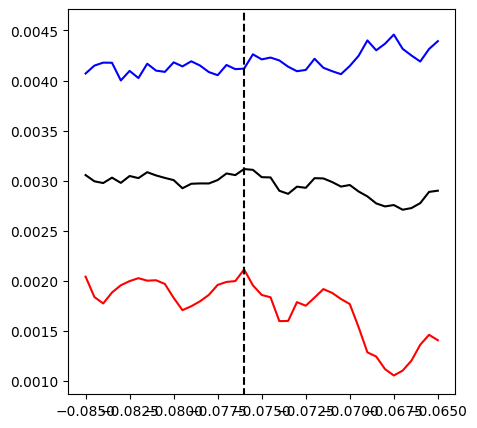

In [ ]:
%matplotlib inline
plot_index = min_index[0]
# plot_index = 4
print(f'cz_pulse_durations = {y[plot_index]}')
plt.figure(figsize=(5,5))
plt.plot(x, magnitudes0[plot_index],'-r')
plt.plot(x, magnitudes1[plot_index],'-b')
# plt.plot(x, total_magnitude[plot_index],'-k')
plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
plt.show()

cz_pulse_amplitudes = -0.07600000000000001


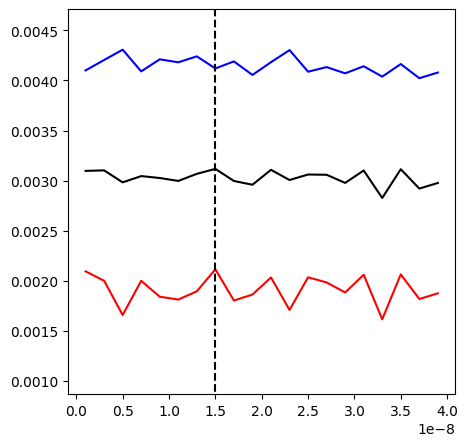

In [ ]:
%matplotlib inline
plot_index = min_index[1]
# plot_index = 12
print(f'cz_pulse_amplitudes = {x[plot_index]}')
plt.figure(figsize=(5,5))
plt.plot(y, magnitudes0.T[plot_index],'-r')
plt.plot(y, magnitudes1.T[plot_index],'-b')
# plt.plot(y, total_magnitude.T[plot_index],'-k')
plt.vlines(y[min_index[0]],0,1,colors='k',linestyles='dashed')
plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
plt.show()

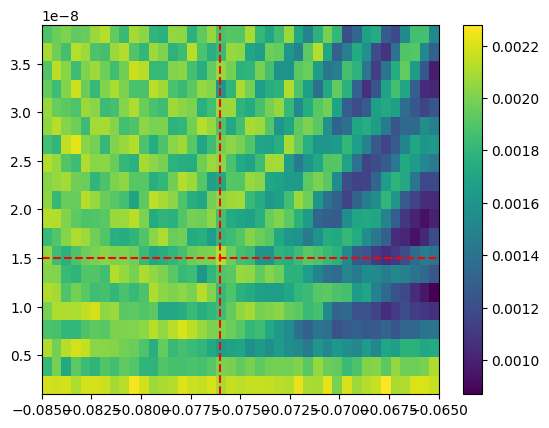

In [ ]:
plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()
plt.imshow(magnitudes1, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

In [ ]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

NameError: name 'state_coord' is not defined

## CZ_calibration Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20231231'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20231231-121410-941-404eaf-cz_calibration_ssro'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20231231-121410-941-404eaf-cz_calibration_ssro


assignment = 0.6695963541666666
assignment = 0.6549479166666666


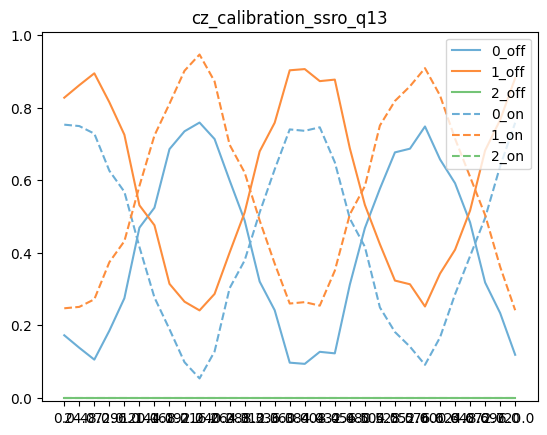

In [ ]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

In [ ]:
np.diff(np.mean(magnitudes[:,:-3,2],axis = 1))

array([0.])

In [ ]:
colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
print(colors[1])

[0.4        0.74117647 0.38823529 1.        ]


In [ ]:
print(colors)

In [ ]:
magnitudes[:,:-3,0]

array([[0.95328687, 1.        , 0.97489076, 0.98119963, 0.95625897,
        0.97826324, 0.97291053, 0.99195332, 0.96982418, 1.        ,
        0.95966036, 0.95933393, 0.95112348, 0.99720885, 0.9554089 ,
        0.98439055, 0.93278169, 0.99826859, 1.        , 0.98239483,
        0.96128176, 0.93895345, 0.96381981, 0.98376218, 0.91227093,
        0.95988543, 0.95262008, 0.96938914, 0.97041375, 0.9554089 ,
        0.9835155 ],
       [0.57196983, 0.62658829, 0.55304507, 0.57090802, 0.56681152,
        0.57872153, 0.57781171, 0.55342449, 0.55171574, 0.56521868,
        0.57140295, 0.55482668, 0.53874458, 0.57462524, 0.63326385,
        0.51777045, 0.58888649, 0.56366518, 0.59009961, 0.56085663,
        0.57303289, 0.56764709, 0.57985954, 0.55793859, 0.61847084,
        0.53434505, 0.56776091, 0.55990903, 0.54272767, 0.61843364,
        0.58206046]])

In [ ]:
# %matplotlib inline
# qubit = 'q13'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.r')
# plt.show()

# qubit = 'q14'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.b')
# plt.show()

In [ ]:
# %matplotlib inline
# qubit = 'q13'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c0',control_onsq13=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c1',control_onsq13=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c2',control_onsq13=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

# %matplotlib inline
# qubit = 'q14'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c0',control_onsq14=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c1',control_onsq14=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c2',control_onsq14=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.36277471 -0.15911288 -0.20366183]
 [-0.29625934  1.42344841 -0.12718907]
 [-0.14756231 -0.02953404  1.17709634]]


## ro_amplitude_optimization_gef Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
name = '20231225-165135-093-09e0cd-cz_calibration_ssro'
dp = f'data_directory/{name[:8]}/{name}/dataset.hdf5'

In [ ]:
ds = load_dataset(dp)
ds

<xarray.Dataset>
Dimensions:           (shot: 1024, ramsey_phasesq14: 34, control_onsq14: 2,
                       ReIm: 2, ramsey_phasesq13: 34, control_onsq13: 2)
Coordinates:
  * shot              (shot) int32 0 1 2 3 4 5 ... 1018 1019 1020 1021 1022 1023
  * ramsey_phasesq14  (ramsey_phasesq14) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * ramsey_phasesq13  (ramsey_phasesq13) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * control_onsq14    (control_onsq14) bool False True
  * control_onsq13    (control_onsq13) bool False True
Dimensions without coordinates: ReIm
Data variables:
    yq14              (shot, ramsey_phasesq14, control_onsq14, ReIm) float64 ...
    yq13              (shot, ramsey_phasesq13, control_onsq13, ReIm) float64 ...
Attributes:
    name:     cz_calibration_ssro
    tuid:     20231225-165135-093

0.091


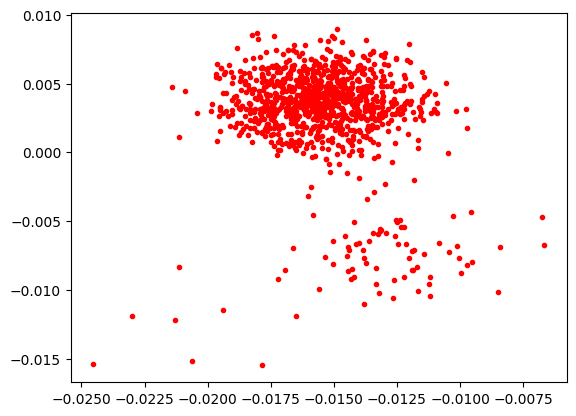

In [ ]:
%matplotlib inline
# select the data with ro_amplitudesq12 = 0.051
amp = ds.ro_amplitudesq12.values[5]
# for amp in ds.ro_amplitudesq12.values:
print(amp)
qubit = 'q130'
ds0 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 0 )
ds1 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 1 )
ds2 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 2 )
# ds0 = (ds0.values).reshape(4096*3,2)
# ds1 = (ds1.values).reshape(4096*3,2)
# ds2 = (ds2.values).reshape(4096*3,2)

cut0 = 0
cut1 = 15
plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds1[cut0::cut1,0].values,ds1[cut0::cut1,1].values,'*')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
plt.show()

assignment = 0.8388671875


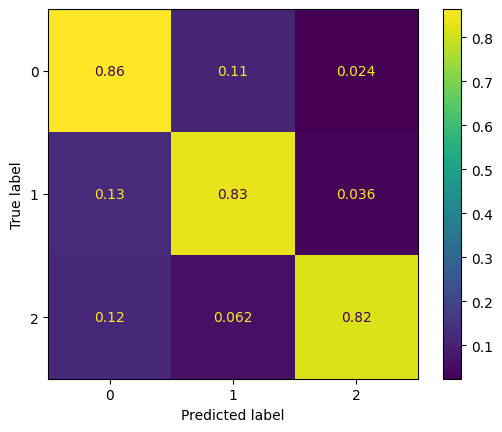

In [ ]:
import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset = ds
qubit = 'q12'
data_var = f'y{qubit}0'

for coord in dataset.coords:
    if f'amplitudes{qubit}' in str(coord):
        amplitude_coord = coord
    elif 'state' in str(coord):
        state_coord = coord
    elif 'shot' in str(coord):
        shot_coord = coord

independents = dataset[state_coord].values
amplitudes = dataset.coords[amplitude_coord]
shots = len(dataset[shot_coord].values)
fit_results = {}
# for indx, ro_amplitude in enumerate(amplitudes):
indx = 3
# print(f'{indx = }')
# print(f'{ro_amplitude.values = }')
y = np.repeat(independents,shots)
IQ_complex = np.array([])
for state in independents:
    IQ_complex_0 = dataset[data_var].isel({amplitude_coord:[indx],state_coord:state})
    IQ_complex = np.append(IQ_complex,IQ_complex_0)
# I = IQ_complex.real.flatten()
# Q = IQ_complex.imag.flatten()
# IQ = np.array([I,Q]).T
IQ = IQ_complex.reshape(-1,2)
lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
# breakpoint()
# print(IQ)
y_pred = lda.fit(IQ,y).predict(IQ)

cm = confusion_matrix(y,y_pred)
cm_norm = confusion_matrix(y,y_pred,normalize='true')
# assignment = 1 - 1/2 * (err_wr_0 + err_wr_1)
assignment = np.trace(cm_norm)/len(independents)
print(f'{assignment = }')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
disp.plot()
plt.show()

In [ ]:
from numpy.linalg import inv
print(cm_norm)
cm_inv = inv(cm_norm)
print(cm_inv)
print(np.dot(cm_inv,cm_norm))

[[0.86425781 0.11132812 0.02441406]
 [0.12890625 0.83496094 0.03613281]
 [0.12011719 0.0625     0.81738281]]
[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]
[[ 1.00000000e+00 -4.40186082e-17 -8.83285957e-18]
 [ 3.78725371e-17  1.00000000e+00  8.53131584e-18]
 [ 2.47198095e-17  0.00000000e+00  1.00000000e+00]]


In [ ]:
v = [0.87,0.11,1-0.87-0.11]
print(v)

[0.87, 0.11, 0.020000000000000004]


In [ ]:
def mitigated(v,a0,a1):
    return np.dot(cm_inv,v)-[a0,a1,1-a0-a1]
res = minimize(mitigated, v)


TypeError: mitigated() missing 2 required positional arguments: 'a0' and 'a1'

In [ ]:
a,b = 0.8,0.1
v = [a,b,1-a-b]
u = np.dot(cm_inv,v)
print(v,u,np.sum(u))

[0.8, 0.05, 0.14999999999999997] [ 0.93534224 -0.08680117  0.05269794] 0.9012390169552309


In [ ]:
# Define the function to be minimized
from scipy.linalg import norm
def m(t):
    return norm(u-np.array(t))

In [ ]:
# Define the constraints
def con(t):
   return t[0]+t[1]+t[2]-1
# Define the constraints in the form required by the minimize function
cons = ({'type': 'eq', 'fun': con},
        {'type': 'ineq', 'fun': lambda t: t[0]},
        {'type': 'ineq', 'fun': lambda t: t[1]},
        {'type': 'ineq', 'fun': lambda t: t[2]})

In [ ]:
from scipy.optimize import minimize
result = minimize(m, v, method='SLSQP', constraints=cons)
print(np.abs(np.round(result.x,10)))

[0.94132282 0.         0.05867718]


In [ ]:
cm_inv

array([[ 1.18425448, -0.1557683 , -0.02848618],
       [-0.17588313,  1.22477137, -0.04888825],
       [-0.16058158, -0.0707597 ,  1.23134128]])

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

1.1842544812150915,-0.15576829843331808,-0.028486182781773627,-0.1758831264569345,1.2247713733537886,-0.04888824689685401,-0.1605815783706242,-0.07075969795381643,1.2313412763244407


In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]


## Redis Parameters

In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
node = 'cz_chevron'
# qubits = ['q21','q22','q21_q22']
qubits = ['q21']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"cs:{qubit}")
    # Print the redis config line by line
    print(redis_config['cz_chevron'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q21:
not_calibrated


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = ['q13','q14']
qubits = ['q21_q22','q16_q21']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"couplers:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['cz_pulse_frequency'])
    print(redis_config['cz_pulse_duration'])
    print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21_q22:
215627272.72727272
3.313354605772508e-07
0.15
Qubit parameters q16_q21:
344000000.0
3.7186273915678165e-07
0.1


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q21','q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    for key, value in redis_config.items():
        print(f"{key}: {value}")
    # print(redis_config['cz_pulse_frequency'])
    # print(redis_config['cz_pulse_duration'])
    # print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21:
resonator_minimum_1: 6752486342.162048
ro_freq_1_backup: nan
reset_leakage: nan
cz_leakage: nan
ro_freq: 6752763432.928663
ro_pulse_duration: 3e-06
spec_ampl_default: 0.0003
ro_ampl_opt: 0.013000000000000001
spec_pulse_duration: 5e-06
cz_pulse_amplitude: nan
fidelity: nan
mw_ef_amp180: 0.11446605070998332
anharmonicity: nan
cz_pulse_duration: nan
t2_echo_time: nan
selectivity: nan
ro_freq_1: 6752487847.575863
ro_acq_delay: 2.2e-07
att: 0
mw_amp180_backup: nan
ro_freq_opt_backup: nan
cz_pulse_frequency: nan
cz_pop_loss: nan
Ql: 12054.248517286636
resonator_minimum_1_backup: nan
ro_freq_backup: nan
mw_motzoi: 0.033333333333333326
mw_pulse_duration: 2e-08
mw_amp180: 0.10184491770717556
cz_pulse_width: nan
mw_motzoi_backup: nan
reset_duration_qc: nan
inv_cm_opt: 1.1226039356631239,-0.08314853049884019,-0.03945540516428335,-0.15964734521169482,1.7178761693558662,-0.5582288241441716,-0.15638461930616093,-0.8923045550712444,2.0486891743774054
Ql_1: 11041.058172230927
res

In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q12','q13','q14','q15']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    print(redis_config['freq_01'])
    print(redis_config['freq_12'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q12:
3366985350.8172603
3173745577.505435
Qubit parameters q13:
3583392807.127604
3344617330.110173
Qubit parameters q14:
3333262125.7570114
3133075732.4790416
Qubit parameters q15:
3872762251.21086
3631663526.956842


## Save VNA values

In [101]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = [ 'q12','q13','q14','q15']
qubits = ['q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
qubit_freq_01_list,qubit_freq_ro_list,qubit_freq_12_list = {},{},{}
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['clock_freqs:readout'])
    print(redis_config['clock_freqs:f01'])
    # print(redis_config['clock_freqs:f12'])
    # qubit_freq_ro_list[qubit] = redis_config['clock_freqs:readout']
    # qubit_freq_01_list[qubit] = redis_config['clock_freqs:f01']
    # qubit_freq_12_list[qubit] = redis_config['clock_freqs:f12']
    # qubit_freq_12_list[qubit] = redis_config['clock_freqs:f01']

Qubit parameters q16:
6519447559.757598
4151000000.0
Qubit parameters q17:
7155389971.012634
5317000000.0
Qubit parameters q18:
6686259671.686979
4739000000.0
Qubit parameters q19:
6928059415.48827
5010500000.0
Qubit parameters q20:
6678811460.04715
4300000000.0
Qubit parameters q21:
7157387896.154296
5115500000.0
Qubit parameters q22:
6704570028.309857
4625500000.0
Qubit parameters q23:
6751912322.179543
5176666666.666667
Qubit parameters q24:
6307979570.1058855
4534000000.0
Qubit parameters q25:
7098352461.236609
5213000000.0


In [ ]:
for qubit in qubits:
    d = float(qubit_freq_ro_list[qubit]) - (float(qubit_freq_01_list[qubit])+float(qubit_freq_12_list[qubit]))
    print(d/1e6)

307.3397968161507
-572.6001307877655
401.3421511736212
-777.8378519722243
29.43924152974224
-562.4636578379517
20.548475479722022
-532.777912630641
240.17673071382904
-925.0276451222992


In [33]:
from tergite_acl.config.VNA_LOKIB_values import VNA_resonator_frequencies, VNA_qubit_frequencies, VNA_f12_frequencies
for qubit in qubits:
    VNA_resonator_frequencies[qubit] = float(qubit_freq_ro_list[qubit])
    VNA_qubit_frequencies[qubit] = float(qubit_freq_01_list[qubit])
    VNA_f12_frequencies[qubit] = float(qubit_freq_12_list[qubit])
# rewrite the VNA_values.py file
with open('config/VNA_LOKIB_values.py', 'w') as f:
    f.write(f"VNA_resonator_frequencies = {VNA_resonator_frequencies}\n")
    f.write(f"VNA_qubit_frequencies = {VNA_qubit_frequencies}\n")
    f.write(f"VNA_f12_frequencies = {VNA_f12_frequencies}\n")

In [35]:
import numpy as np
print(VNA_resonator_frequencies)
print(VNA_qubit_frequencies)
print(VNA_f12_frequencies)
# anahar = (np.array(list(VNA_f12_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
# print(anahar)

{'q06': 6833000000, 'q07': 7259000000, 'q08': 6392000000, 'q09': 7269000000, 'q10': 7087000000, 'q11': 6988000000, 'q12': 6438000000, 'q13': 7237000000, 'q14': 6596000000, 'q15': 7120000000, 'q16': 6519441958.239083, 'q17': 7155392831.918434, 'q18': 6686265221.120888, 'q19': 6928064288.763453, 'q20': 6678816790.502101, 'q21': 7098356420.920728, 'q22': 6704573843.302045, 'q23': 6751926623.795597, 'q24': 6307978375.322713, 'q25': 7157388073.503611}
{'q06': 4400000000, 'q07': 4800000000, 'q08': 4100000000, 'q09': 5100000000, 'q10': 4400000000, 'q11': 4900000000, 'q12': 4200000000, 'q13': 5000000000, 'q14': 4300000000, 'q15': 4900000000, 'q16': 4348665965.012221, 'q17': 5316738467.893348, 'q18': 4611904952.765134, 'q19': 5017782420.527518, 'q20': 4300176736.695439, 'q21': 5156535148.11715, 'q22': 4494214245.042077, 'q23': 5031650613.904923, 'q24': 4379185892.173868, 'q25': 5220057554.504263}
{'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.3

In [ ]:
# VNA_resonator_frequencies = {'q11': 6934572785.610347, 'q12': 6606753684.764918, 'q13': 6688313321.558435, 'q14': 6331351280.923618, 'q15': 6933698139.447023, 'q16': 6491000000.0, 'q17': 7059000000.0, 'q18': 6712000000.0, 'q19': 6818000000.0, 'q20': 6494000000.0, 'q21': 6751000000.0, 'q22': 6477000000.0, 'q23': 7052000000.0, 'q24': 6583000000.0, 'q25': 6853000000.0}
# VNA_qubit_frequencies = {'q11': 3714895945.38633, 'q12': 3366961177.836733, 'q13': 3585016857.038436, 'q14': 3334060710.6204877, 'q15': 3872936707.280074, 'q16': 3189000000.0, 'q17': 3932000000.0, 'q18': 3254000000.0, 'q19': 3921000000.0, 'q20': 3333000000.0, 'q21': 3773000000.0, 'q22': 3326000000.0, 'q23': 3911000000.0, 'q24': 3271000000.0, 'q25': 4009000000.0}
# VNA_f12_frequencies = {'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.376709, 'q15': 3631763299.7146664, 'q16': 2993000000.0, 'q17': 3699000000.0, 'q18': 3154000000.0, 'q19': 3682000000.0, 'q20': 3233000000.0, 'q21': 3542000000.0, 'q22': 3131000000.0, 'q23': 3674000000.0, 'q24': 3171000000.0, 'q25': 3770000000.0}
